[IPython Notebook](legacy_spots.ipynb) |  [Python Script](legacy_spots.py)

Comparing Spots in PHOEBE 2.0 vs PHOEBE Legacy
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [3]:
%matplotlib inline

In [4]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Spots and Compute Options
---------------------

In [5]:
b.add_spot(component='primary', relteff=0.8, radius=20, colat=45, colon=90, feature='spot01')

<ParameterSet: 4 parameters | qualifiers: colat, colon, radius, relteff>

In [6]:
b.add_dataset('LC', time=np.linspace(0, 3, 101))

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [7]:
b.add_compute('phoebe', compute='phoebe2')

<ParameterSet: 28 parameters | datasets: _default, lc01>

In [8]:
b.add_compute('legacy', compute='phoebe1')

<ParameterSet: 14 parameters | datasets: _default, lc01>

In [13]:
b.set_value_all('atm@phoebe2', 'extern_planckint')
b.set_value_all('atm@phoebe1', 'blackbody')

ValueError: value must be one of ['blackbody', 'ck2004', 'ck2004_all']

In [9]:
b.run_compute('phoebe2', model='phoebe2model')

<ParameterSet: 2 parameters | qualifiers: flux, time>

In [10]:
b.run_compute('phoebe1', model='phoebe1model')

<ParameterSet: 2 parameters | qualifiers: flux, time>

Plotting
------------

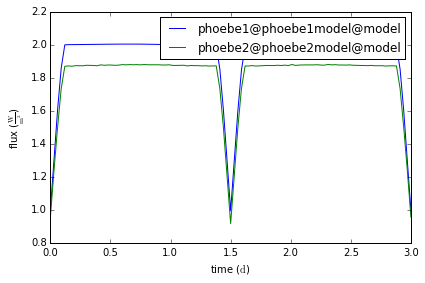

In [12]:
axs, artists = b.plot()
legend = plt.legend()